<a href="https://colab.research.google.com/github/keinam53/Deep_learning/blob/main/1_Wprowadzenie/7_Siec_neuronowa_implementacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implementacja prostej sieci neuronowej

##### Kroki:
    1. Zainicjowanie parametrów sieci
    2. Propagacja wprzód
    3. Obliczenie błędu predykcji
    4. Propagacja wsteczna (uczenie modelu)
    5. Test działania modelu


In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

X = np.array([1.4, 0.7])
y_true = np.array([1.8])

In [2]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.rand(n_h, n_x)
    W2 = np.random.rand(n_h, n_y)
    return W1, W2

In [3]:
def forward_propagation(X, W1, W2):
    H1 = np.dot(X, W1)
    y_pred = np.dot(H1, W2)
    return H1, y_pred

In [4]:
def calculate_error(y_pred, y_true):
    return y_pred - y_true

In [5]:
def predict(X, W1, W2):
    _, y_pred = forward_propagation(X, W1, W2)
    return y_pred[0]

In [6]:
def backpropagation(X, W1, W2, learning_rate, iters=1000, precision=0.0000001):

    H1, y_pred = forward_propagation(X, W1, W2)
    train_loss = []

    for i in range(iters):
        error = calculate_error(y_pred, y_true)
        W2 = W2 - learning_rate * error * H1.T 
        W1 = W1 - learning_rate * error * np.dot(X.T, W2.T)

        y_pred = predict(X, W1, W2)
        
        train_loss.append(abs(calculate_error(y_pred, y_true[0])))

        if abs(error) < precision:
            break 
    print(f'Iter #{i}: y_pred {y_pred}: loss: {abs(calculate_error(y_pred, y_true[0]))}')

    return W1, W2, train_loss

In [7]:
def build_model():

    W1, W2 = initialize_parameters(2, 2, 1)
    W1, W2, train_loss = backpropagation(X, W1, W2, 0.01)
    model = {'W1': W1, 'W2': W2, 'train_loss': train_loss}
    return model

In [8]:
model = build_model()

Iter #268: y_pred 1.7999999093794767: loss: 9.062052330754966e-08


In [10]:
loss = pd.DataFrame({'train_loss': model['train_loss']})
loss = loss.reset_index().rename(columns={'index': 'iter'})
loss['iter'] = loss['iter'] + 1
loss.head()

,iter,train_loss
0,1,1.322249
1,2,1.279680
2,3,1.237540
3,4,1.195837
4,5,1.154590


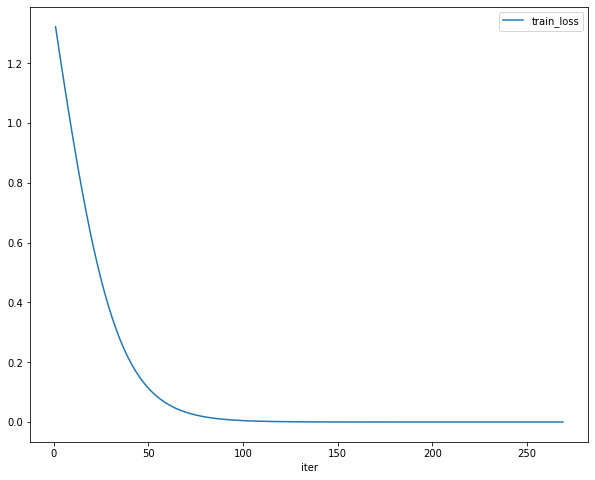

In [23]:
loss.plot(x='iter', y='train_loss', figsize=(10, 8))

In [24]:
predict(X, model['W1'], model['W2'])

1.7999999093794767